# Data Pre-Processing

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Importing Data

In [2]:
df=pd.read_csv("EasyVisa.csv")

In [3]:
df.shape

(25480, 12)

In [4]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


## Data Cleaning
* Missing or Null values
* Duplicate Values
* Check Data types
* Understand Dataset

### Missing or Null values

In [6]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_na

[]

In [7]:
# Displaying the percentage of missing values for each feature
for feature in features_with_na:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 5)
    print(f"{feature}: {missing_percentage}% missing values")

**Observation:** No null values in the dataset

### Duplicate Values

In [8]:
df.duplicated().sum()

0

**Observation:** No duplicate values in the dataset

### Data Types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


## Feature Engineering

In [10]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

We are dropping the `case_id` column from the dataset because it is a unique identifier that does not provide any meaningful information for our analysis or model training. Unique identifiers like this don't contribute to predicting the target variable and could introduce noise into the model.

In [11]:
# Dropping 'case_id' as it does not provide any meaningful information for the analysis
df=df.drop('case_id',axis=1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [12]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

The `yr_of_estab` (year of establishment) column represents the year a company was established, which is not directly useful for analysis. To make it more meaningful, we will convert it into `company_age` by subtracting the year of establishment from the current year. This transformation will give us the age of the company, which is more relevant for analysis and modeling.

In [13]:
from datetime import date

date_now=date.today()
current_year=date_now.year
current_year

2024

calculating the company age

In [14]:
df['company_age']=current_year-df['yr_of_estab']

In [15]:
df=df.drop('yr_of_estab',axis=1)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,19


## Analysing features

### Numerical Features
**Note:** `O`stands for `object` data type, which is typically used for strings or categorical data in pandas. It essentially means `non-numerical` data.



In [16]:
# Identifying numerical features (i.e., columns that are not of object type)
num_features = list(df.select_dtypes(exclude="object").columns)
# Displaying the numerical feature columns and their count
print(f"Numerical Feature Columns: {num_features}")
print(f"Number of Numerical Features: {len(num_features)}")


Numerical Feature Columns: ['no_of_employees', 'prevailing_wage', 'company_age']
Number of Numerical Features: 3


### Categorical Features

In [17]:
# Identifying categorical features (i.e., columns with object data type)
cat_features = [col for col in df.columns if df[col].dtype == 'O']

# Displaying the categorical feature columns and their count
print(f"Categorical Feature Columns: {cat_features}")
print(f"Number of Categorical Features: {len(cat_features)}")


Categorical Feature Columns: ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']
Number of Categorical Features: 8


### Discrete Features
Discrete features can only take specific, distinct values. These are typically counted and cannot take fractional values.

**Examples:**

* Number of children (e.g., 0, 1, 2, 3)
* Number of cars (e.g., 1, 2, 3)
* Shoe size (e.g., 7, 8, 9)
  
**Characteristics:**

* Values are typically represented with integers (whole numbers).
* Discrete features have gaps between values (e.g., we can’t have 1.5 children).
* The range of values can be finite or infinite, but the values are distinct.

In [18]:
# Identifying discrete numerical features (i.e., numerical features with 25 or fewer unique values)
disc_features = [col for col in num_features if df[col].nunique() <= 25]

# Displaying the discrete numerical feature columns
disc_features


[]

### Continious features

Continuous features can take any value within a given range, including decimal (fractional) values. These are typically measured and can take an infinite number of values.

**Examples:**

* Height (e.g., 5.72 feet)
* Weight (e.g., 72.5 kg)
* Temperature (e.g., 98.6°F)

**Characteristics:**

* Values are often represented with floating-point numbers.
* Continuous features have a range (min to max) but can theoretically take any value within that range.
* In theory, there are no gaps between values.

In [19]:
# Identifying continuous numerical features (i.e., numerical features that are not discrete)
continuous_features = [col for col in num_features if col not in disc_features]

# Displaying the number of continuous numerical features
print('Number of Continuous Features:', len(continuous_features))


Number of Continuous Features: 3


## Split DataFrame into Inputs and Outputs
In this step, we split the DataFrame into two variables:

* **X:** This variable contains the independent columns (features) that will be used to make predictions.
* **y:** This variable contains the dependent column, specifically the case_status column, which we aim to predict.

Before splitting, we encode the case_status values to numerical format, where:

* `denied` is encoded as 0
* `certified` is encoded as 1

This encoding is necessary because machine learning models cannot interpret string labels directly; they require numerical representations to perform calculations effectively.

In [20]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'region_of_employment',
       'prevailing_wage', 'unit_of_wage', 'full_time_position', 'case_status',
       'company_age'],
      dtype='object')

In [21]:
X=df.drop('case_status',axis=1)
Y=df['case_status']

In [22]:
X.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   region_of_employment   25480 non-null  object 
 6   prevailing_wage        25480 non-null  float64
 7   unit_of_wage           25480 non-null  object 
 8   full_time_position     25480 non-null  object 
 9   company_age            25480 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [24]:
Y.head()

,case_status
0,Denied
1,Certified
2,Denied
3,Denied
4,Certified


In [25]:
# Encoding target column
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'case_status' column and create a new column in the DataFrame
Y = label_encoder.fit_transform(df['case_status'])

# Verifying the encoding
Y[:5]


array([1, 0, 1, 1, 0])

## Feature Transformation
### Continious Features

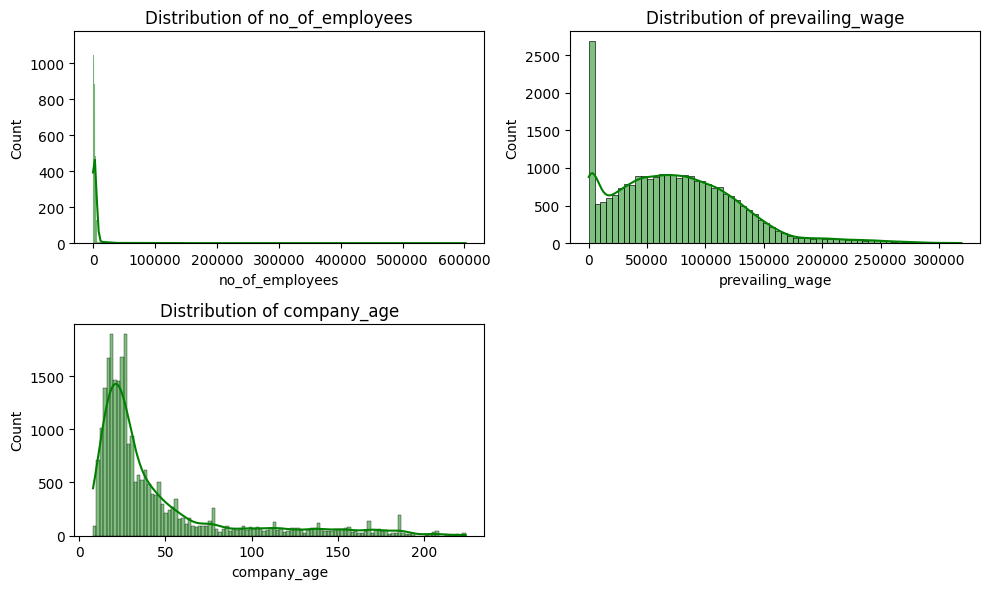

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))

# List of columns to plot
columns = ['no_of_employees', 'prevailing_wage', 'company_age']

# Create subplots for each column
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)  # Create a 2x2 grid for subplots
    sns.histplot(x=X[col], color='green', kde=True)  # Adding kernel density estimate (KDE) for better visualization
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')  # Adding a title for clarity
    plt.tight_layout()

plt.show()  # Display the plots


**Skewness** refers to the asymmetry of the probability distribution of a real-valued random variable. It quantifies how much a distribution deviates from a symmetrical bell curve (normal distribution).

* A distribution is **positively skewed** (or right-skewed) if it has a longer tail on the right side.
* A distribution is **negatively skewed** (or left-skewed) if it has a longer tail on the left side.
* A normal distribution has a skewness of zero, indicating that it is perfectly symmetrical.


Understanding skewness is essential because many statistical techniques assume normality. Transforming skewed data can improve model performance and meet the assumptions of parametric tests.

#### Checking Skewness
To evaluate the skewness of the `no_of_employees`, `prevailing_wage` and `company_age` columns (**continious features**) in our dataset, we can use the following code:

In [27]:
skewness=X[['no_of_employees','prevailing_wage','company_age']].skew()#skewness for all continious_features
skewness

,0
no_of_employees,12.265260
prevailing_wage,0.755776
company_age,2.037301


Since `no_of_employees` and `company_age` columns exhibit skewness, we can apply a power transform to make the data more Gaussian-like. The `PowerTransformer` in `scikit-learn` can be used for this purpose. It supports the Box-Cox transform (for positive values) and the Yeo-Johnson transform (which can handle zero and negative values).



#### Apply the Yeo-Johnson Transform to the Skewed Columns
Apply Power (Yeo-Johnson) Transformer to Check if it can reduces the outliers

In [28]:
from sklearn.preprocessing import PowerTransformer

# Initialize the PowerTransformer with Yeo-Johnson
power_transformer = PowerTransformer(method='yeo-johnson')

transform_features=['no_of_employees','company_age']

# Applying the transformation
X_copy=power_transformer.fit_transform(X[transform_features])

In [29]:
# chaecking type for X_copy
type(X_copy)

numpy.ndarray

In [30]:
# turning numpy array to pandas dataframe
X_copy = pd.DataFrame(X_copy, columns=transform_features)
transofrmed_skewness=X_copy.skew(axis=0, skipna=True)
transofrmed_skewness

,0
no_of_employees,0.399339
company_age,0.103264


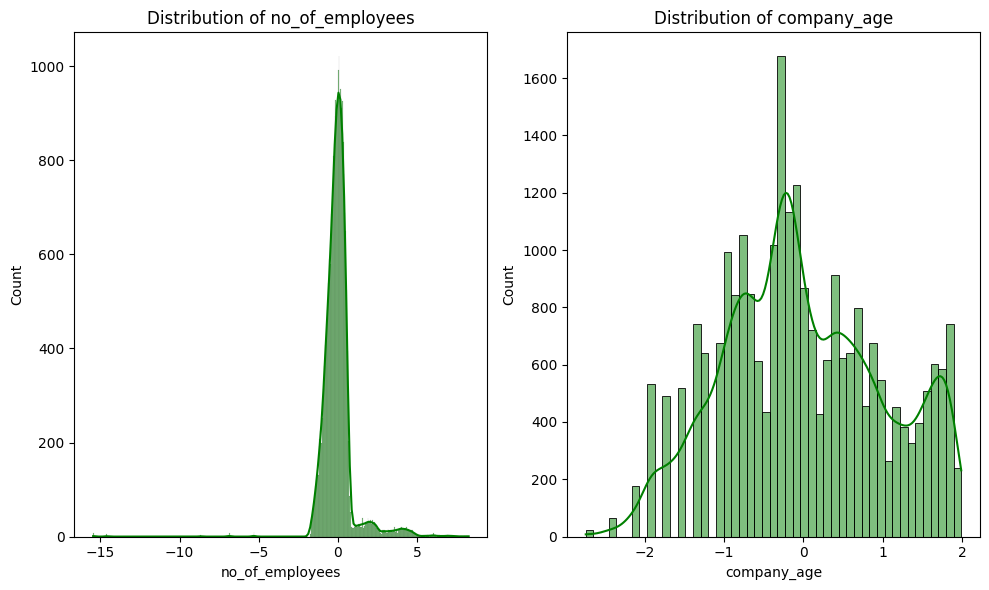

In [31]:
# Visualize the Columns to view unskewed results
# Set the figure size
plt.figure(figsize=(10, 6))

# Loop through each feature and create subplots
for i, col in enumerate(transform_features):
    plt.subplot(1, len(transform_features), i + 1)  # Dynamic subplot based on number of features
    sns.histplot(x=X_copy[col], color='green', kde=True)  # Adding KDE for smoother visualization
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')  # Adding titles for clarity
    plt.tight_layout()

# Display the plots
plt.show()

### Categorical Features

In [32]:
# Display the number of unique values for each categorical feature
print("Unique values in categorical features:")
for feature in cat_features:
    unique_count = df[feature].nunique()
    print(f"{feature}: {unique_count}")


Unique values in categorical features:
continent: 6
education_of_employee: 4
has_job_experience: 2
requires_job_training: 2
region_of_employment: 5
unit_of_wage: 4
full_time_position: 2
case_status: 2


## Feature Encoding and Feature Scaling


Feature encoding and scaling are crucial preprocessing steps in preparing our data for machine learning models. These techniques ensure that the input data is in a suitable format and scale for effective modeling.

### 1. One-Hot Encoding

**One-Hot Encoding** is a method used to convert categorical variables with a **limited number of unique values** that are **not ordinal** into a numerical format. This encoding creates binary columns for each category, allowing machine learning algorithms to interpret categorical data effectively.

- **Purpose**: To facilitate better predictions by converting categorical variables into a format suitable for ML algorithms.
  
### 2. Ordinal Encoding

**Ordinal Encoding** is applied to categorical variables that have a **ranked order** among the categories. It is particularly useful for columns with **many unique categories**, where the order is significant.

- **Use Case**: For ordinal variables, which comprise a finite set of discrete values with a ranked ordering, Ordinal Encoding transforms the categorical values into integers based on their rank.
- **Implementation**: Label encoding is supported within column transformers, making it straightforward to integrate into preprocessing pipelines.

### 3. Standard Scaler

The **Standard Scaler** standardizes features by removing the mean and scaling them to unit variance. This scaling technique is essential for algorithms that are sensitive to the scale of the data (such as k-NN, SVM, etc.).

- **Purpose**: To ensure that all numerical features contribute equally to the distance calculations in algorithms that rely on feature scale.

### 4. Power Transformer

**Power Transforms** are techniques used to transform numerical input or output variables to follow a Gaussian or more Gaussian-like distribution. This transformation can help with modeling issues related to heteroscedasticity (non-constant variance) or other situations where normality is desired.

- **Types**: The **PowerTransformer** supports methods like Box-Cox and Yeo-Johnson for different types of data distributions.

### Selecting Features for Preprocessing

When selecting features for preprocessing, consider the following:

- **One-Hot Encoding**: Use for categorical features with a small number of unique values and no intrinsic order.
- **Ordinal Encoding**: Use for categorical features that have a natural order or ranking.
- **Standard Scaler**: Apply to all numerical features to standardize their scale.
- **Power Transformer**: Utilize for numerical features that exhibit skewness to make their distribution more Gaussian-like.


### Selecting Features for Preprocessing

In [33]:
num_features=list(X.select_dtypes(exclude="object").columns)
num_features

['no_of_employees', 'prevailing_wage', 'company_age']

### Preprocessing using Column Transformer

In [34]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define columns for different types of transformations
ordinal_columns = ['has_job_experience', 'requires_job_training', 'full_time_position', 'education_of_employee']
one_hot_columns = ['continent', 'unit_of_wage', 'region_of_employment']
transform_columns = ['no_of_employees', 'company_age']
numeric_features = num_features

# Create transformers for different types of data
numeric_transformer = StandardScaler()  # For scaling numerical features
one_hot_transformer = OneHotEncoder()   # For one-hot encoding categorical features
ordinal_transformer = OrdinalEncoder()   # For ordinal encoding of ranked categories

# Create a pipeline for the Power Transformer
transform_pipeline = Pipeline(steps=[
    ('power_transformer', PowerTransformer(method='yeo-johnson'))  # Apply Yeo-Johnson transformation
])

# Create a Column Transformer to apply the transformations
preprocessor = ColumnTransformer(
    transformers=[
        ("one_hot_encoder", one_hot_transformer, one_hot_columns),        # One-Hot Encoding
        ("ordinal_encoder", ordinal_transformer, ordinal_columns),         # Ordinal Encoding
        ("power_transform", transform_pipeline, transform_columns),        # Power Transformation
        ("standard_scaler", numeric_transformer, numeric_features)        # Standard Scaling
    ]
)


In [35]:
# Applying custom transform
X=preprocessor.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  0.38666657,
        -1.39853722, -0.65122993],
       [ 0.        ,  1.        ,  0.        , ..., -0.14228155,
         0.1698353 , -0.53321103],
       [ 0.        ,  1.        ,  0.        , ...,  1.69498375,
         0.91907852, -0.6748337 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., -0.19871259,
         1.36027953,  1.63833662],
       [ 0.        ,  1.        ,  0.        , ..., -0.16387483,
         0.22150859,  2.18122353],
       [ 0.        ,  1.        ,  0.        , ..., -0.10805575,
        -0.06776315,  0.45814768]])

### Handling Imbalanced Classes with SMOTE and Tomek Links

When dealing with classification problems, especially in scenarios where one class is significantly underrepresented, the model may struggle to learn from the minority class. To address this issue, resampling techniques can be employed to balance the class distribution.

#### SMOTE and Tomek Links

**SMOTE** (Synthetic Minority Over-sampling Technique) is an oversampling technique that generates synthetic samples for the minority class. **Tomek Links** are used to clean up the decision boundary by removing instances from the majority class that are nearest to the minority class.

The `SMOTEENN` class combines both techniques, applying SMOTE for oversampling and Tomek Links for undersampling, resulting in a more balanced dataset.

#### Implementation Steps

1. **Import Necessary Libraries**: The `SMOTETomek` and `SMOTEENN` classes from the `imblearn.combine` module are imported to enable the use of these resampling techniques.

2. **Initialize the Resampling Strategy**: An instance of the `SMOTEENN` class is created, specifying the desired sampling strategy and a random seed for reproducibility.

   - **Parameters**:
     - `random_state`: Ensures the results are consistent across different runs.
     - `sampling_strategy`: Defines the target class to be oversampled; in this case, the minority class.

3. **Fit the Model and Resample the Data**: The `fit_resample` method is called to generate a new balanced dataset based on the original features `X` and target variable `y`.


In [36]:
# 1. Import Necessary Libraries
from imblearn.combine import SMOTETomek, SMOTEENN
# 2. Initialize the Resampling Strategy
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the Model and Resample the Data
X_res, Y_res = smt.fit_resample(X, Y)
# X_res: Resampled feature set.
# Y_res: Resampled target variable.

### Train-Test Split

The **train-test split** is a crucial procedure in machine learning used to evaluate the performance of algorithms when predicting outcomes on unseen data. This technique helps ensure that the model is capable of generalizing well beyond the data it was trained on.

#### Key Points:

- **Purpose**: The primary goal of the train-test split is to provide a fair assessment of how well a machine learning model can make predictions on new, unseen data.

- **Procedure**: The dataset is divided into two subsets:
  - **Training Set**: This portion is used to train the model, allowing it to learn the underlying patterns in the data.
  - **Test Set**: This subset is kept separate and is used to evaluate the model's performance after training.

- **Benefits**:
  - **Simplicity**: The train-test split is a straightforward and efficient method for assessing model performance.
  - **Comparison**: By using this method, you can easily compare the performance of different machine learning algorithms and select the one that performs best on unseen data.

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,
                                               test_size=0.2,
                                               train_size=0.8,
                                               random_state=42,)

In [38]:
# looking at the shape of train set
X_train.shape,Y_train.shape

((13638, 24), (13638,))

In [39]:
# looking at the shape of test set
X_test.shape,Y_test.shape

((3410, 24), (3410,))

# Model Training Setup

In [40]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,\
                            ConfusionMatrixDisplay,precision_score,\
                            recall_score,f1_score,roc_auc_score,\
                            roc_curve
from xgboost import XGBClassifier

try:
 from catboost import CatBoostClassifier
except:
  !pip install catboost
  from catboost import CatBoostClassifier



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00


In [41]:
def evaluate_model(y_true, y_pred):
    """
    Evaluate the performance of a classification model.

    Args:
        y_true: The true labels.
        y_pred: The predicted labels by the model.

    Returns:
        A tuple containing the accuracy, F1 score, precision, recall, and ROC AUC score.
    """
    # Calculate performance metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # You can specify average='macro' or 'micro' as needed
    precision = precision_score(y_true, y_pred, average='weighted')  # Same for precision
    recall = recall_score(y_true, y_pred, average='weighted')  # Same for recall
    roc_auc = roc_auc_score(y_true, y_pred)  # ROC AUC requires probabilities, adjust accordingly

    return acc, f1, precision, recall, roc_auc

In [42]:
# Define the models to evaluate
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}


In [43]:
def train_and_evaluate_models(X, Y, models):
    """
    Train and evaluate different models and log the results to TensorBoard.

    Args:
        X: Features dataset.
        Y: Target variable.
        models: Dictionary of models to evaluate.
        log_dir: Directory for storing TensorBoard logs.

    Returns:
        DataFrame containing the report of all model metrics.
    """
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Lists to hold evaluation metrics
    models_list = []
    accuracy_list = []
    auc_list = []

    for model_name, model in models.items():
        print(f"Training {model_name}...")

        # Fit the model
        model.fit(X_train, Y_train)

        # Make predictions
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)

        # Evaluate model performance on training set
        train_metrics = evaluate_model(Y_train, Y_train_pred)
        print(f'Model performance for {model_name} on Training set:')
        print(f'- Accuracy: {train_metrics[0]:.4f}')
        print(f'- F1 Score: {train_metrics[1]:.4f}')
        print(f'- Precision: {train_metrics[2]:.4f}')
        print(f'- Recall: {train_metrics[3]:.4f}')

        # Evaluate model performance on test set
        test_metrics = evaluate_model(Y_test, Y_test_pred)
        print(f'Model performance for {model_name} on Test set:')
        print(f'- Accuracy: {test_metrics[0]:.4f}')
        accuracy_list.append(test_metrics[0])
        print(f'- F1 Score: {test_metrics[1]:.4f}')
        print(f'- Precision: {test_metrics[2]:.4f}')
        print(f'- Recall: {test_metrics[3]:.4f}')

        models_list.append(model_name)
        print('=' * 35)

    # Create a report DataFrame
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)

    return report

In [44]:
# Call the function to train and evaluate models
report = train_and_evaluate_models(X=X_res,Y=Y_res,models=models)

Training Random Forest...
Model performance for Random Forest on Training set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Model performance for Random Forest on Test set:
- Accuracy: 0.9534
- F1 Score: 0.9534
- Precision: 0.9534
- Recall: 0.9534
Training Decision Tree...
Model performance for Decision Tree on Training set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Model performance for Decision Tree on Test set:
- Accuracy: 0.9293
- F1 Score: 0.9293
- Precision: 0.9293
- Recall: 0.9293
Training Gradient Boosting...
Model performance for Gradient Boosting on Training set:
- Accuracy: 0.8822
- F1 Score: 0.8823
- Precision: 0.8824
- Recall: 0.8822
Model performance for Gradient Boosting on Test set:
- Accuracy: 0.8956
- F1 Score: 0.8957
- Precision: 0.8958
- Recall: 0.8956
Training Logistic Regression...
Model performance for Logistic Regression on Training set:
- Accuracy: 0.7348
- F1 Score: 0.7351
- Precision: 0.7358
- Rec

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model performance for AdaBoost Classifier on Training set:
- Accuracy: 0.8539
- F1 Score: 0.8539
- Precision: 0.8541
- Recall: 0.8539
Model performance for AdaBoost Classifier on Test set:
- Accuracy: 0.8683
- F1 Score: 0.8684
- Precision: 0.8687
- Recall: 0.8683


In [45]:
# view training report
report

,Model Name,Accuracy
0,Random Forest,0.953372
4,K-Neighbors Classifier,0.940176
5,XGBClassifier,0.935191
6,CatBoosting Classifier,0.929619
1,Decision Tree,0.929326
2,Gradient Boosting,0.895601
7,Support Vector Classifier,0.870088
8,AdaBoost Classifier,0.868328
3,Logistic Regression,0.745161


From the performance report, it is evident **that Random Forest** and **K-Neighbors Classifier** have achieved the highest accuracy metrics among all the models. These two models demonstrate strong predictive capabilities, making them ideal candidates for further refinement.

To enhance their performance, we can proceed with *hyperparameter tuning* for both the Random Forest and K-Neighbors Classifier models.

## Hyperparameter Tuning

In [46]:
# Define parameter grids for Random Forest and K-Neighbors Classifier
rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

### Randomized Search Cross-Validation for Hyperparameter Tuning

In this section, we will perform hyperparameter tuning using `RandomizedSearchCV` on multiple models. We will iterate over a list of models with their corresponding parameter distributions, tune the models, and retrieve the best hyperparameters.

#### Key Steps:
1. **RandomizedSearchCV**: Randomized search over a parameter grid with cross-validation.
2. **Model Training**: For each model, the search runs 100 iterations with 3-fold cross-validation.
3. **Output**: Display the best parameters for each model after tuning.

#### Input Variables:
* `randomcv_models`: List of tuples where each tuple contains a model name, the model object, and the parameter grid.
* `X_res, Y_res`: The training data (features and target) after any preprocessing (e.g., resampling if applied).


#### Code Implementation:

In [47]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('Random Forest', RandomForestClassifier(), rf_params),
    ('K-Neighbors Classifier', KNeighborsClassifier(), knn_params)
]

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Dictionary to store the best hyperparameters for each model
best_model_params = {}

# Iterating over models and their respective parameter distributions
for model_name, model, param_grid in randomcv_models:
    try:
        # Defining the RandomizedSearchCV object
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grid,
            n_iter=100,  # Number of parameter settings sampled
            cv=3,        # 3-fold cross-validation
            verbose=2,    # Verbose output to monitor progress
            n_jobs=-1     # Use all available processors
        )

        # Fitting the RandomizedSearchCV on the training data
        random_search.fit(X_res, Y_res)

        # Storing the best hyperparameters
        best_model_params[model_name] = random_search.best_params_

    except Exception as e:
        print(f"Error tuning {model_name}: {e}")

# Displaying the best hyperparameters for each model
for model_name, params in best_model_params.items():
    print(f"---------------- Best Params for {model_name} -------------------")
    print(params)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for Random Forest -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}
---------------- Best Params for K-Neighbors Classifier -------------------
{'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'auto'}


In [61]:
best_model_params

{'Random Forest': {'n_estimators': 100,
  'max_features': 'sqrt',
  'max_depth': None},
 'K-Neighbors Classifier': {'weights': 'distance',
  'n_neighbors': 4,
  'algorithm': 'auto'}}

### Evaluating Tuned Models using ROC-AUC

Once we have the best parameters for each model from `RandomizedSearchCV`, we can train the final models and evaluate their performance using the ROC-AUC score and ROC curves.

#### Key Steps:
1. **Best Models Setup**: Instantiate the models using the best hyperparameters found.
2. **Model Evaluation**: We will use ROC-AUC as the primary evaluation metric.
3. **Visualize ROC Curves**: ROC curves help us understand the trade-off between the true positive rate (TPR) and false positive rate (FPR).

#### Input Variables:
- `model_param`: A dictionary containing the best parameters for each model.
- `X_res, Y_res`: The training data (features and target).
- `train_and_evaluate_models`: A custom function that trains and evaluates models.


In [69]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['Random Forest']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['K-Neighbors Classifier']),
}
tuned_report =train_and_evaluate_models(X=X_res, Y=Y_res, models=best_models)

Training Random Forest Classifier...
Model performance for Random Forest Classifier on Training set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Model performance for Random Forest Classifier on Test set:
- Accuracy: 0.9531
- F1 Score: 0.9531
- Precision: 0.9531
- Recall: 0.9531
Training KNeighborsClassifier...
Model performance for KNeighborsClassifier on Training set:
- Accuracy: 1.0000
- F1 Score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
Model performance for KNeighborsClassifier on Test set:
- Accuracy: 0.9733
- F1 Score: 0.9733
- Precision: 0.9735
- Recall: 0.9733


### Training and Evaluating K-Neighbors Classifier

In this section, we will train a `KNeighborsClassifier` using the best parameters found from `RandomizedSearchCV`. We'll evaluate its performance on the test set using accuracy score and a classification report.

#### Key Steps:
1. **Initialize Model**: Instantiate the `KNeighborsClassifier` with the best hyperparameters.
2. **Train the Model**: Fit the model on the training data.
3. **Model Evaluation**: Predict on the test set and evaluate the model using accuracy and a detailed classification report.

#### Input Variables:
- `model_param`: Contains the best hyperparameters for `K-Neighbors Classifier`.
- `X_train, Y_train`: Training data (features and target).
- `X_test, Y_test`: Test data (features and target).


In [73]:
best_model = KNeighborsClassifier(**best_model_params['K-Neighbors Classifier'])
best_model = best_model.fit(X_train,Y_train)
Y_pred = best_model.predict(X_test)
score = accuracy_score(Y_test,Y_pred)
class_report = classification_report(Y_test,Y_pred)

print("FINAL MODEL 'K-Neighbors Classifier'")
print ("Accuracy Score value: {:.4f}".format(score))
print (class_report)

FINAL MODEL 'K-Neighbors Classifier'
Accuracy Score value: 0.9733
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1561
           1       0.97      0.99      0.98      1849

    accuracy                           0.97      3410
   macro avg       0.97      0.97      0.97      3410
weighted avg       0.97      0.97      0.97      3410



### Confusion Matrix Visualization

In this section, we will visualize the confusion matrix of a trained classification model. The confusion matrix provides insight into the performance of the model by displaying the counts of true positives, false positives, true negatives, and false negatives. This visualization will help us understand how well the model is performing on the test set.

#### Key Steps:
1. **Generate Predictions**: Use the trained model to predict the labels of the test dataset.
2. **Create Confusion Matrix**: Calculate the confusion matrix based on the true and predicted labels.
3. **Normalize and Annotate**: Normalize the confusion matrix for better interpretability and annotate it with raw counts and percentages.
4. **Plot the Confusion Matrix**: Use Matplotlib to visualize the confusion matrix with labels for each cell, indicating both the count and the percentage of predictions.

#### Input Variables:
* `model`: The trained classifier model (e.g., `KNeighborsClassifier`).
* `X_test`: Test features (input data for prediction).
* `Y_test`: True test labels (actual labels for comparison).
* `figsize`: Optional; size of the output plot (default is (10, 10)).
* `text_size`: Optional; size of the text annotations on the plot (default is 15).

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix_with_labels(model, X_test, Y_test, figsize=(10, 10), text_size=15):
    """
    Plots a confusion matrix with additional labels (TP, FP, TN, FN).

    Args:
        model: The trained classifier model.
        X_test: Test features.
        Y_test: True test labels.
        figsize: Size of the output plot.
        text_size: Size of the text on the plot.
    """
    # Generate confusion matrix
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)

    # Plot the confusion matrix without the default values
    fig, ax = plt.subplots(figsize=figsize)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)

    # Remove the text from the original ConfusionMatrixDisplay to avoid overlaps
    for artist in disp.ax_.texts:
        artist.set_visible(False)

    # Normalize the confusion matrix
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.0

    # Add custom text for each cell (raw count and percentage)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}\n({cm_norm[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=text_size)

    # Additional plot customization (labels and titles)
    ax.set_title("Confusion Matrix with Labels", fontsize=text_size+5)
    ax.set_xlabel('Predicted Label', fontsize=text_size)
    ax.set_ylabel('True Label', fontsize=text_size)

    plt.show()


### K-Neighbors Classifier Training and Confusion Matrix Visualization

In this section, we will train a `KNeighborsClassifier` using the best parameters obtained from hyperparameter tuning (e.g., `RandomizedSearchCV`). After training the model, we will visualize the confusion matrix to assess its performance on the test dataset.

#### Key Steps:
1. **Initialize Model**: Create an instance of `KNeighborsClassifier` with the best hyperparameters.
2. **Train the Model**: Fit the model on the training data.
3. **Visualize Confusion Matrix**: Use the `plot_confusion_matrix_with_labels` function to visualize the confusion matrix of the model's predictions on the test set.

#### Input Variables:
* `best_model_params`: A dictionary containing the best hyperparameters for the `K-Neighbors Classifier`.
* `X_train, Y_train`: Training data (features and target).
* `X_test, Y_test`: Test data (features and target).


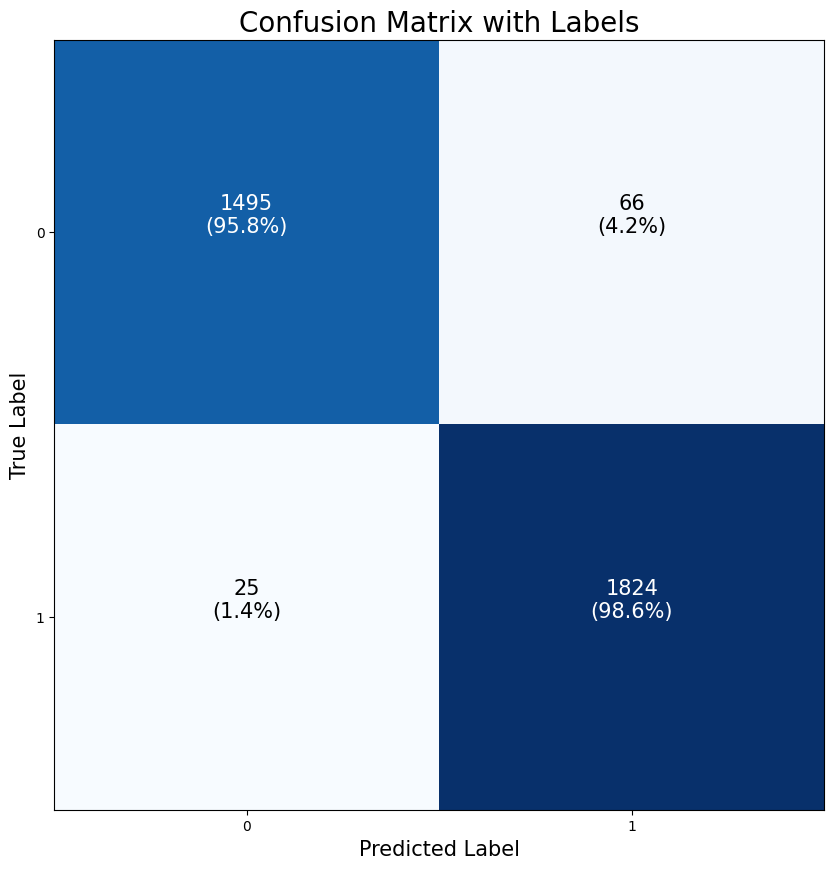

In [72]:
# Initialize and train the K-Neighbors Classifier with the best parameters
best_model = KNeighborsClassifier(**best_model_params['K-Neighbors Classifier'])
best_model.fit(X_train, Y_train)

# Visualize the confusion matrix for the trained model on the test set
plot_confusion_matrix_with_labels(best_model, X_test, Y_test)